In [68]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from functools import reduce
import matplotlib.patches as mpatches
from matplotlib.pyplot import figure
#import matplotlib as plt

In [3]:
oscar_movie_db=pd.read_csv("..\DataSources/Oscars1934-2015.csv")
pd.to_numeric(oscar_movie_db.Year, errors='coerce')
#to convert year to int, you can also do this:
#oscar_movie_db['Year'] = oscar_movie_db['Year'].astype(int)

#create a movie list (historical movies)
df_movies = oscar_movie_db[((oscar_movie_db['Award']== 'Best Picture')|(oscar_movie_db['Award']== 'Best Motion Picture'))]
df_movies=df_movies.reset_index(drop=True)
movies= list(df_movies['Name'])

#create a winner list
df_winners = oscar_movie_db[((oscar_movie_db['Award']== 'Best Picture')|(oscar_movie_db['Award']== 'Best Motion Picture'))&(oscar_movie_db['Winner'] == 1)]
df_winners=df_winners.reset_index(drop=True)
winners= list(df_winners['Name'])

#create a nominee list
df_losers = oscar_movie_db[((oscar_movie_db['Award']== 'Best Picture')|(oscar_movie_db['Award']== 'Best Motion Picture'))&(oscar_movie_db['Winner'] == 0)]
df_losers=df_losers.reset_index(drop=True)
losers= list(df_losers['Name'])

df_bestPicture=oscar_movie_db[((oscar_movie_db['Award']== 'Best Picture')|(oscar_movie_db['Award']== 'Best Motion Picture'))]
df_bestPicture=df_bestPicture.reset_index(drop=True)
df_bestPicture=df_bestPicture[["Year", "Winner", "Name"]].rename(columns={"Winner": "Best Picture", "Name": "Title"})

df_bestActor=oscar_movie_db[((oscar_movie_db['Award']== 'Actor')|(oscar_movie_db['Award']== 'Actor in a Leading Role'))]
df_bestActor=df_bestActor.reset_index(drop=True)
df_bestActor=df_bestActor[["Year", "Winner", "Film"]].rename(columns={"Winner": "Best Actor", "Film": "Title"})

df_bestActress=oscar_movie_db[((oscar_movie_db['Award']== 'Actress')|(oscar_movie_db['Award']== 'Actress in a Leading Role'))]
df_bestActress=df_bestActress.reset_index(drop=True)
df_bestActress=df_bestActress[["Year", "Winner", "Film"]].rename(columns={"Winner": "Best Actress", "Film": "Title"})

df_bestSuppActor=oscar_movie_db[(oscar_movie_db['Award']== 'Actor in a Supporting Role')]
df_bestSuppActor=df_bestSuppActor.reset_index(drop=True)
df_bestSuppActor=df_bestSuppActor[["Year", "Winner", "Film"]].rename(columns={"Winner": "Best Supporting Actor", "Film": "Title"})

df_bestSuppActress=oscar_movie_db[(oscar_movie_db['Award']== 'Actress in a Supporting Role')]
df_bestSuppActress=df_bestSuppActress.reset_index(drop=True)
df_bestSuppActress=df_bestSuppActress[["Year","Winner","Film"]].rename(columns={"Winner": "Best Supporting Actress", "Film": "Title"})

df_bestDirectors=oscar_movie_db[(oscar_movie_db['Award']== 'Directing')]
df_bestDirectors=df_bestDirectors.reset_index(drop=True)
df_bestDirectors=df_bestDirectors[["Year","Winner","Film"]].rename(columns={"Winner": "Best Director", "Film": "Title"})

In [4]:
#OMBD Calls - Movies

theMoviesDF_OMBD = pd.read_csv('..\DataSources/theMoviesDF_OMBD.csv')
#theMoviesDF_OMBD


In [5]:
#OMBD Calls - Winners
theWinnersDF_OMBD = pd.read_excel('..\DataSources/theWinnersDF_OMBD.xlsx')
#theWinnersDF_OMBD

In [6]:
#OMBD Calls- Losers
theLosersDF_OMBD = pd.read_csv('..\Datasources/theLosersDF_OMBD.csv')
#theLosersDF_OMBD

In [7]:
#TMDB Calls
theMoviesDF_TMDB=pd.read_csv('..\DataSources/all_tmbd_movie_info.csv')

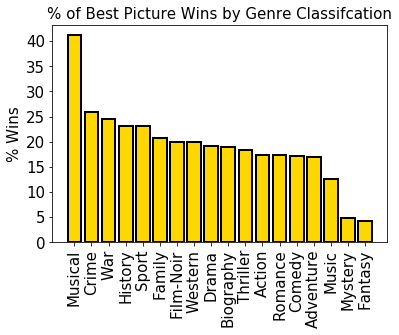

<Figure size 1800x1800 with 0 Axes>

In [69]:
#Number of Genres by - Winners
genreWinners=theWinnersDF_OMBD['Genre']
flatGenreWinners=[]

for i in genreWinners:
    x=i.split(", ")
    for j in x:
        flatGenreWinners.append(j)

genresWinners_df=pd.DataFrame(flatGenreWinners).rename(columns={0:"Genre"})
genresWinners_df['Count']=1
genresWinners_df=genresWinners_df.groupby("Genre", as_index=False).count()
genresWinners_df=genresWinners_df.sort_values(by='Count', ascending=False)

#Number of Genres by - Losers
genreLosers=theLosersDF_OMBD['Genre']
flatGenreLosers=[]

for i in genreLosers:
    x=i.split(", ")
    for j in x:
        flatGenreLosers.append(j)

genresLosers_df=pd.DataFrame(flatGenreLosers).rename(columns={0:"Genre"})
genresLosers_df['Count']=1
genresLosers_df=genresLosers_df.groupby("Genre", as_index=False).count()
genresLosers_df=genresLosers_df.sort_values(by='Count', ascending=False)

#merge the 2 dfs and calculate percentages and graph.
genreMerge = genresWinners_df.merge(genresLosers_df,on='Genre',how='left',suffixes=(' of Wins',' of Losses'))
genreMerge['% Wins'] = (genreMerge['Count of Wins']/(genreMerge['Count of Wins'] + genreMerge['Count of Losses']))*100
genreMerge = genreMerge.sort_values('% Wins', ascending=False)

plt.bar(genreMerge["Genre"],genreMerge["% Wins"],color='gold',edgecolor='black',linewidth=2)
plt.xticks(genreMerge["Genre"],rotation=90,size=15)
plt.yticks(size=15)
plt.title("% of Best Picture Wins by Genre Classifcation",size=15)
plt.ylabel("% Wins",size=15)
plt.figure(figsize=(25,25))
#plt.show()
plt.savefig("BestPicturebyGenre")

In [29]:
print("oh thats cool")

oh thats cool


In [79]:
#DataFrame for SciKit
genreMovies=theMoviesDF_OMBD[['Title','Year','Genre']]

for i in range(len(genreMovies['Genre'])):
    x=genreMovies['Genre'][i].split(", ")
    genreMovies['Genre'][i]=x

s=genreMovies.apply(lambda x:pd.Series(x['Genre']), axis=1).stack().reset_index(level=1, drop=True)
s.name = 'Genre'
df2 = genreMovies.drop('Genre', axis=1).join(s)
df2=pd.get_dummies(df2, columns=['Genre'])
df2=df2.groupby('Year').sum()
df2.head()
#dfs=[df_bestActor, df_bestActress, df_bestSuppActor, df_bestSuppActress]
#theMoviesDF = reduce(lambda df1,df2: pd.merge(df1,df2,on=['Title'], how='left'), dfs)
#theMoviesDF.fillna(0, inplace=True)
#theMoviesDF

C:\Users\Ex-Sell\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2961: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


,Genre_Action,Genre_Adventure,Genre_Animation,Genre_Biography,Genre_Comedy,Genre_Crime,Genre_Documentary,Genre_Drama,Genre_Family,Genre_Fantasy,...,Genre_Music,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Short,Genre_Sport,Genre_Thriller,Genre_War,Genre_Western
Year,,,,,,,,,,,,,,,,,,,,,
1935,0,1,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1944,0,0,0,0,1,2,0,4,0,0,...,1,0,1,1,0,0,0,0,1,0
1945,0,0,0,0,1,1,0,3,0,1,...,0,1,2,2,0,0,0,1,0,0
1946,0,0,0,0,0,0,0,4,2,1,...,0,0,0,2,0,0,0,0,1,1
1947,0,0,0,0,2,1,0,4,1,1,...,0,0,0,1,0,0,0,0,0,0


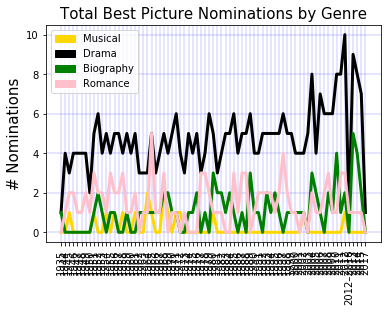

<Figure size 72x2160 with 0 Axes>

In [83]:
#all_tmbd_movie_info.csv
plt.plot(df2['Genre_Musical'],color='gold',linewidth=3)
#plt.plot(df2.index.values,df2['Genre_Crime'],c='grey')
#plt.plot(df2.index.values,df2['Genre_War'],c='red')
#plt.plot(df2.index.values,df2['Genre_Sport'],c='green')
#plt.plot(df2.index.values,df2['Genre_Family'],c='silver')
#plt.plot(df2.index.values,df2['Genre_Film-Noir'],c='brown')
#plt.plot(df2.index.values,df2['Genre_Western'],c='orange')
plt.plot(df2['Genre_Drama'],color='black',linewidth=3)
plt.plot(df2.index.values,df2['Genre_Biography'],color='green',linewidth=3)
#plt.plot(df2['Genre_Thriller'],c='salmon')
#plt.plot(df2.index.values,df2['Genre_Action'],c='lightblue')
plt.plot(df2['Genre_Romance'],color='pink',linewidth=3)


# Incorporate the other graph properties
#plt.xlim(1950,2011)
#plt.ylim(20,50)
plt.ylabel("# Nominations",size=15)
plt.title("Total Best Picture Nominations by Genre",size=15)
plt.grid(which='major',axis='both',color='b',linewidth='0.2')
plt.xticks(rotation=90)
# Create a legend
Musical = mpatches.Patch(color='gold', label='Musical')
Drama = mpatches.Patch(color='black', label='Drama')
Bio = mpatches.Patch(color='green', label='Biography')
Romance = mpatches.Patch(color='pink', label='Romance')
plt.legend(handles=[Musical,Drama,Bio,Romance],loc='upper left', frameon=True)
plt.figure(figsize=(1,30))
plt.savefig("BestPicNombyGenre")

In [54]:
genresWinners_df

,Genre,Count
5,Drama,68
13,Romance,19
2,Biography,15
9,History,13
3,Comedy,13
4,Crime,13
16,War,11
15,Thriller,9
1,Adventure,8
11,Musical,7


In [ ]:
#all_tmbd_movie_info.csv
'''
CrossNom = oscar_movie_db[['Title','Best Actor','Best Actress','Best Director','Best Supporting Actor','Best Supporting Actress']]
Win_Lose = df_movies[['Name','Winner']]
Win_Lose.rename(columns={'Name':'Title'}, inplace=True)
Win_Lose = Win_Lose.sort_values('Title')
Win_Lose = Win_Lose.reset_index(drop=True)
CrossNom = CrossNom.merge(Win_Lose,on="Title")
'''